In [193]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px 

In [194]:
data = pd.read_csv(r"C:\Users\anasw\OneDrive\Desktop\Analyst datasets\index.csv")
df = pd.DataFrame(data)

df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1308,2024-08-17,2024-08-17 16:31:54.837,card,ANON-0000-0000-0277,23.02,Cortado
1309,2024-08-17,2024-08-17 16:33:48.977,card,ANON-0000-0000-0192,32.82,Latte
1310,2024-08-17,2024-08-17 18:48:58.852,card,ANON-0000-0000-0456,32.82,Cappuccino
1311,2024-08-17,2024-08-17 21:18:56.806,card,ANON-0000-0000-0040,27.92,Americano with Milk


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1313 non-null   object 
 1   datetime     1313 non-null   object 
 2   cash_type    1313 non-null   object 
 3   card         1224 non-null   object 
 4   money        1313 non-null   float64
 5   coffee_name  1313 non-null   object 
dtypes: float64(1), object(5)
memory usage: 61.7+ KB


In [196]:
df.duplicated().sum()
df.isnull().sum()

df["card"] = df["card"].fillna(df["card"].mode()[0])

In [197]:
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [198]:
df["coffee_name"].value_counts()

coffee_name
Americano with Milk    319
Latte                  282
Cappuccino             222
Americano              185
Cortado                123
Hot Chocolate           79
Espresso                59
Cocoa                   44
Name: count, dtype: int64

Top 3 Selling Coffees:

Americano with Milk,
Latte,
Cappuccino

In [199]:
df["cash_type"].value_counts()

cash_type
card    1224
cash      89
Name: count, dtype: int64

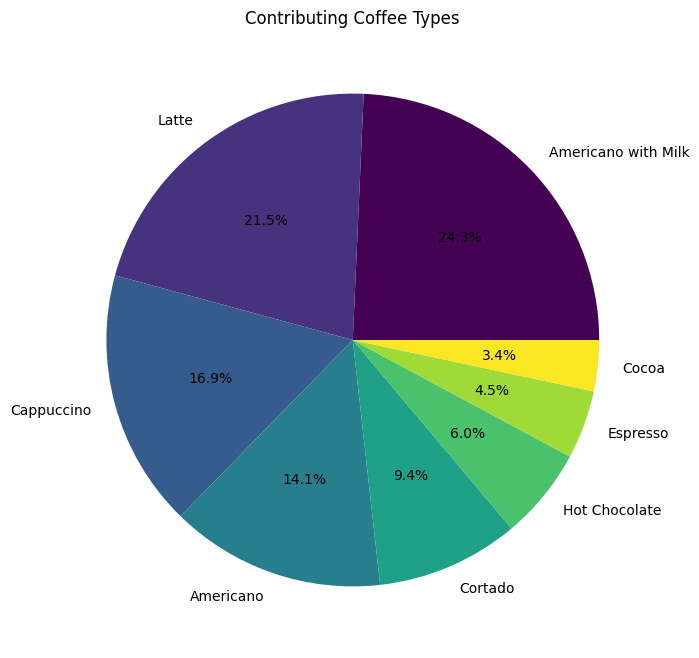

In [200]:
plt.figure(figsize=(8,8))
plt.pie(df["coffee_name"].value_counts() , labels= df["coffee_name"].value_counts().index , autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(df["coffee_name"].value_counts()))))
plt.title("Contributing Coffee Types")
plt.show()


Different types of coffee contributing to the total sales of this cafe.


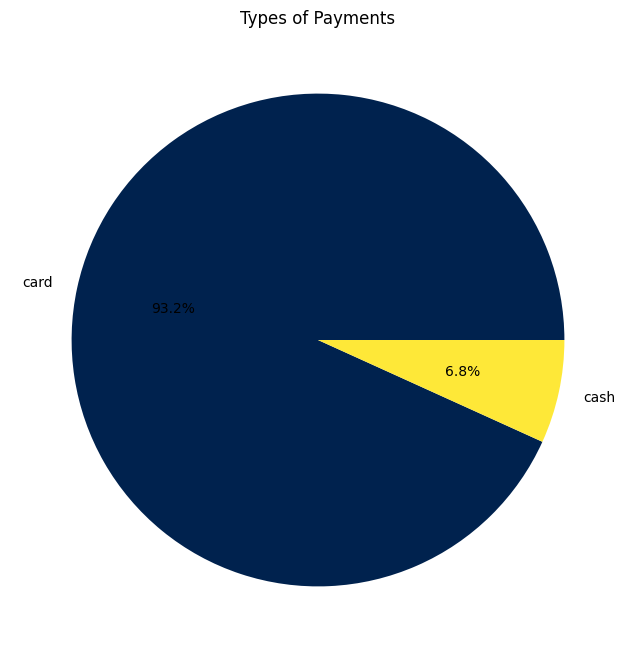

In [201]:
plt.figure(figsize=(8,8))
plt.pie(df["cash_type"].value_counts() , labels= df["cash_type"].value_counts().index , autopct='%1.1f%%', colors=plt.cm.cividis(np.linspace(0, 1, len(df["cash_type"].value_counts()))))
plt.title("Types of Payments")
plt.show()


In [202]:
diff_coffee_sales = df.groupby("coffee_name")['money'].agg(['sum']).reset_index()

In [203]:
diff_coffee_sales.rename(columns = {'sum':'sales'}, inplace = True)

diff_coffee_sales

,coffee_name,sales
0,Americano,5012.86
1,Americano with Milk,10025.86
2,Cappuccino,8186.46
3,Cocoa,1591.32
4,Cortado,3297.56
5,Espresso,1281.82
6,Hot Chocolate,2942.58
7,Latte,10289.12


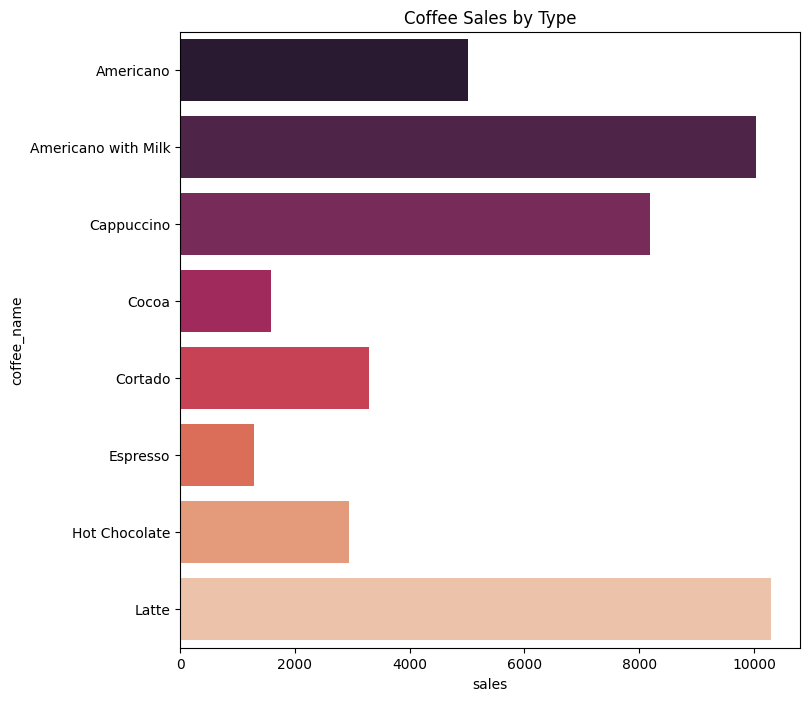

In [204]:
plt.figure(figsize=(8,8))
sns.barplot(y="coffee_name", x="sales", data=diff_coffee_sales , hue = "coffee_name" , palette="rocket")
plt.title("Coffee Sales by Type")
plt.show()

In [205]:
print(df["money"].min()) # df["money"].min()
df["money"].max()

18.12


40.0

In [206]:
m_exp_drink = df[df["money"] == df["money"].max()].reset_index()

m_exp_drink["coffee_name"].value_counts()
print(f"The following are the most expensive drinks priced at 40: {m_exp_drink['coffee_name'].value_counts()}")

The following are the most expensive drinks priced at 40: coffee_name
Latte            16
Cappuccino       10
Hot Chocolate     5
Cocoa             1
Name: count, dtype: int64


In [207]:
m_inexp_drink = df[df["money"] == df["money"].min()].reset_index()
print(f"The following are the least expensive drinks priced at 18.12: {m_inexp_drink['coffee_name'].value_counts()}")

The following are the least expensive drinks priced at 18.12: coffee_name
Espresso    20
Name: count, dtype: int64


In [208]:

print(f"The average sale amount is {df['money'].mean()}")

The average sale amount is 32.465788271134805


In [209]:
df["datetime"] = df["datetime"].astype("datetime64[ns]")

In [192]:
before_12 = df[df["datetime"].dt.hour <=12]

before_12.reset_index()
before_12["coffee_name"].count()

print("Number of drinks sold before 12:00: ", before_12["coffee_name"].count())

Number of drinks sold before 12:00:  510


In [211]:
after_12_18 = df[(df["datetime"].dt.hour > 12) & (df["datetime"].dt.hour <= 18)]

print("Number of drinks sold between 12:00 and 18:00:", after_12_18["coffee_name"].count())

Number of drinks sold between 12:00 and 18:00: 502


In [212]:
after_18 = df[df["datetime"].dt.hour > 18] 
print("Number of drinks sold after 18:00: ", after_18["coffee_name"].count())

Number of drinks sold after 18:00:  301


In [218]:
print(f"The following are the most expensive drinks priced at 40: {m_exp_drink['coffee_name'].value_counts()}\n")
print(f"The following are the least expensive drinks priced at 18.12: {m_inexp_drink['coffee_name'].value_counts()}\n")
print(f"The average sale amount is {df['money'].mean()}")
print("Number of drinks sold before 12:00: ", before_12["coffee_name"].count())
print("Number of drinks sold between 12:00 and 18:00:", after_12_18["coffee_name"].count())
print("Number of drinks sold after 18:00: ", after_18["coffee_name"].count())

The following are the most expensive drinks priced at 40: coffee_name
Latte            16
Cappuccino       10
Hot Chocolate     5
Cocoa             1
Name: count, dtype: int64

The following are the least expensive drinks priced at 18.12: coffee_name
Espresso    20
Name: count, dtype: int64

The average sale amount is 32.465788271134805
Number of drinks sold before 12:00:  510
Number of drinks sold between 12:00 and 18:00: 502
Number of drinks sold after 18:00:  301


Summary of coffee sold with various factors which include: 
1.Most expensive
2.Least Expensive 
3.Average Sale Amount 
4.Drinks sold depending on the time of day.